# Projet Morpion

In [3]:
# Importation de notre classe Morpion depuis le fichier morpion.py
# Cette classe contient l'implémentation du jeu de base
from morpion import Morpion

# Matplotlib : bibliothèque de visualisation pour créer des graphiques
# Nous l'utiliserons pour visualiser l'apprentissage de l'IA
import matplotlib.pyplot as plt

# NumPy : bibliothèque pour le calcul scientifique
# Utilisée pour les opérations mathématiques et la manipulation de tableaux
import numpy as np

# Module random pour générer des nombres aléatoires
# Utilisé pour l'exploration dans l'algorithme de Q-Learning
import random

# IPython.display : module pour contrôler l'affichage dans Jupyter
# clear_output permet d'effacer la sortie précédente pour une meilleure visualisation
from IPython.display import clear_output

In [9]:
# Création d'une nouvelle instance du jeu
game = Morpion()

# L'IA (joueur 1) joue en position 1 (case en haut à gauche)
game.jouer_coup(1, 1)  # Placera un 'O'

# Le joueur humain (joueur 2) joue en position 2 (case en haut au milieu)
game.jouer_coup(2, 2)  # Placera un 'X'

# Affichage de l'état actuel du plateau
game.afficher_plateau()

|     |     
  O  |  X  |  3
_____|_____|_____
     |     |     
  4  |  5  |  6
_____|_____|_____
     |     |     
  7  |  8  |  9
     |     |

In [15]:
# Création d'une nouvelle instance du jeu
game = Morpion()

# L'IA (joueur 1) joue en position 1 (case en haut à gauche)
game.jouer_coup(1, 1)  # Placera un 'O'

# Le joueur humain (joueur 2) joue en position 2 (case en haut au milieu)
game.jouer_coup(2, 2)  # Placera un 'X'

# Affichage de l'état actuel du plateau
game.afficher_plateau()

|     |     
  O  |  X  |  3
_____|_____|_____
     |     |     
  4  |  5  |  6
_____|_____|_____
     |     |     
  7  |  8  |  9
     |     |

In [14]:
2 + 2


4

In [16]:
# Création d'un dictionnaire d'états et leurs valeurs associées
etats_et_valeurs = {
    (1,): 0.1,
    (1, 5, 9): 0.02,
    (1, 5, 3): 0.4,
    (2,): 0.1,
    (2, 3, 1): 0.2,
    (2, 3, 5): 0.5,
}

# Test simple
etat_actuel_1 = [1, 5]
coups_possibles_1 = [2, 3, 4, 6, 7, 8, 9]

coup_choisi = choisir_coup(coups_possibles_1, etat_actuel_1, etats_et_valeurs)
print(f"Coup choisi : {coup_choisi}")


Coup choisi : 7


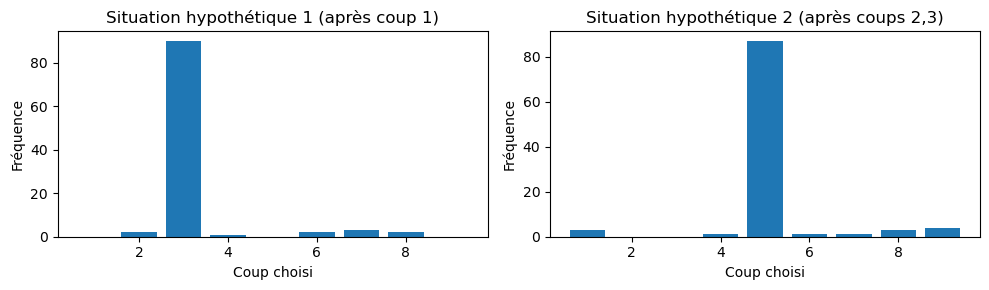

In [17]:
# Création d'un dictionnaire d'états et leurs valeurs associées
# Chaque clé représente un état du jeu sous forme de tuple, et chaque valeur est une estimation de la récompense attendue pour cet état.
etats_et_valeurs = {
    (1): 0.1,          # État après le coup 1 : faible valeur estimée
    (1, 5, 9): 0.02,   # État après les coups 1, 5 puis 9 : faible valeur estimée
    (1, 5, 3): 0.4,    # État après les coups 1, 5 puis 3 : valeur haute estimée
    (2): 0.1,          # État après le coup 2 : faible valeur estimée
    (2, 3, 1): 0.2,    # État après les coups 2, 3, puis 1 : faible valeur estimée
    (2, 3, 5): 0.5,    # État après les coups 2, 3, puis 9 : bonne valeur estimée
}

# Test de la Situation Hypothétique 1
# ----------------------------------
# On simule une situation où le coup 1 a déjà été joué, et on observe quel coup l'agent choisit ensuite.

# État initial : coup 1 déjà joué
etat_actuel_1 = [1, 5]

# Coups encore disponibles sur le plateau
coups_possibles_1 = [2, 3, 4, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
# Cela permet de visualiser le compromis exploration/exploitation en action.
coups_choisis_1 = []
for i in range(100):
    coups_choisis_1.append(choisir_coup(coups_possibles_1, etat_actuel_1, etats_et_valeurs))

# Test de la Situation Hypothétique 2
# ----------------------------------
# On simule une situation où les coups 2 puis 3 ont déjà été joués, et on observe quel coup l'agent choisit ensuite.

# État initial : coups 2 puis 3 déjà joués
etat_actuel_2 = [2, 3]

# Coups encore disponibles sur le plateau
coups_possibles_2 = [1, 4, 5, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
coups_choisis_2 = []
for i in range(100):
    coups_choisis_2.append(choisir_coup(coups_possibles_2, etat_actuel_2, etats_et_valeurs))

# Visualisation des résultats avec deux histogrammes
# ------------------------------------------------
# On crée deux histogrammes pour comparer les choix de l'agent dans les deux situations hypothétiques.

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Histogramme pour la situation 1
axes[0].hist(coups_choisis_1, bins=range(1, 11), align='left', rwidth=0.8)
axes[0].set_title('Situation hypothétique 1 (après coup 1)')
axes[0].set_xlabel('Coup choisi')
axes[0].set_ylabel('Fréquence')

# Histogramme pour la situation 2
axes[1].hist(coups_choisis_2, bins=range(1, 11), align='left', rwidth=0.8)
axes[1].set_title('Situation hypothétique 2 (après coups 2,3)')
axes[1].set_xlabel('Coup choisi')
axes[1].set_ylabel('Fréquence')

# Ajustement de la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichage des histogrammes
plt.show()

In [20]:
# Paramètres de test
etats = [
    [1],          # Joueur 1 joue le coup 1
    [1, 5],       # Joueur 2 joue le coup 5
    [1, 5, 3],    # Joueur 1 joue le coup 3
    [1, 5, 3, 7], # Joueur 2 joue le coup 7
    [1, 5, 3, 7, 2]  # Joueur 1 joue le coup 2 (victoire)
]

etats_et_valeurs = {
    (1,): 0.0,
    (1, 5): 0.0,
    (1, 5, 3): 0.0,
    (1, 5, 3, 7): 0.0
}

recompense_finale = 1.0  # Le joueur 1 a gagné

print("Valeurs avant mise à jour :")
for etat, valeur in etats_et_valeurs.items():
    print(f"État {list(etat)} : {valeur:.3f}")

# Mise à jour des valeurs avec la fonction
nouvelles_valeurs = attribuer_recompense(
    etats_et_valeurs, etats, recompense_finale, taux_apprentissage=0.5, facteur_reduction=0.9
)

# Affichage des résultats
print("\nValeurs mises à jour des états :")
for etat, valeur in nouvelles_valeurs.items():
    print(f"État {list(etat)} : {valeur:.3f}")

Valeurs avant mise à jour :
État [1] : 0.000
État [1, 5] : 0.000
État [1, 5, 3] : 0.000
État [1, 5, 3, 7] : 0.000

Valeurs mises à jour des états :
État [1] : 0.041
État [1, 5] : 0.091
État [1, 5, 3] : 0.203
État [1, 5, 3, 7] : 0.450
État [1, 5, 3, 7, 2] : 1.000


In [21]:
# Paramètres de test
etats = [
    [1],          # Joueur 1 joue le coup 1
    [1, 5],       # Joueur 2 joue le coup 5
    [1, 5, 3],    # Joueur 1 joue le coup 3
    [1, 5, 3, 7], # Joueur 2 joue le coup 7
    [1, 5, 3, 7, 2]  # Joueur 1 joue le coup 2 (victoire)
]

etats_et_valeurs = {
    (1,): 0.0,
    (1, 5): 0.0,
    (1, 5, 3): 0.0,
    (1, 5, 3, 7): 0.0
}

recompense_finale = 1.0  # Le joueur 1 a gagné

print("Valeurs avant mise à jour :")
for etat, valeur in etats_et_valeurs.items():
    print(f"État {list(etat)} : {valeur:.3f}")

# Mise à jour des valeurs avec la fonction existante
nouvelles_valeurs = attribuer_recompense(
    etats_et_valeurs, etats, recompense_finale, taux_apprentissage=0.5, facteur_reduction=0.9
)

# Affichage des résultats
print("Valeurs mises à jour des états :")
for etat, valeur in nouvelles_valeurs.items():
    print(f"État {list(etat)} : {valeur:.3f}")

Valeurs avant mise à jour :
État [1] : 0.000
État [1, 5] : 0.000
État [1, 5, 3] : 0.000
État [1, 5, 3, 7] : 0.000
Valeurs mises à jour des états :
État [1] : 0.041
État [1, 5] : 0.091
État [1, 5, 3] : 0.203
État [1, 5, 3, 7] : 0.450
État [1, 5, 3, 7, 2] : 1.000


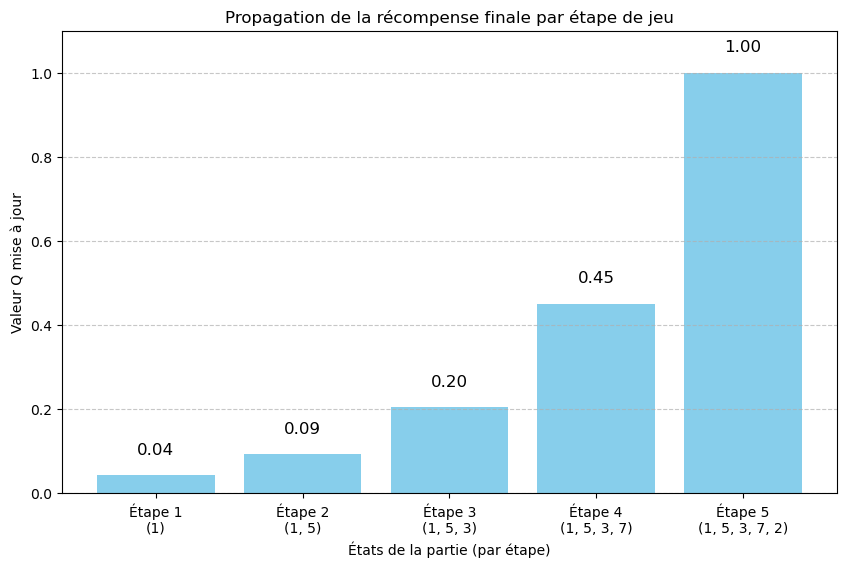

In [22]:
# Préparation des données pour le tracé
labels = [f"Étape {i+1}\n({', '.join(map(str, etat))})" for i, etat in enumerate(etats)]
valeurs_a_tracer = [nouvelles_valeurs[tuple(etat)] for etat in etats]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(labels, valeurs_a_tracer, color='skyblue')
plt.xlabel("États de la partie (par étape)")
plt.ylabel("Valeur Q mise à jour")
plt.title("Propagation de la récompense finale par étape de jeu")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout de la valeur sur chaque barre pour plus de clarté
for i, v in enumerate(valeurs_a_tracer):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', color='black', fontsize=12)

plt.show()

In [24]:
def entrainement_autonome(nb_parties, strategie_j1, strategie_j2, epsilon_j1=0.1, epsilon_j2=0.1,
                         alpha_j1=0.5, gamma_j1=0.9, alpha_j2=0.5, gamma_j2=0.9,
                         joueur1=None, joueur2=None, afficher_partie=False):
    """
    Fonction d'entraînement pour faire s'affronter deux agents
    
    Arguments:
    -----------
    nb_parties : int
        Nombre de parties à jouer
    strategie_j1, strategie_j2 : str
        'rl' pour reinforcement learning, 'random' pour aléatoire
    epsilon_j1, epsilon_j2 : float
        Taux d'exploration pour chaque joueur
    alpha_j1, alpha_j2 : float
        Taux d'apprentissage pour chaque joueur
    gamma_j1, gamma_j2 : float
        Facteur de réduction pour chaque joueur
    joueur1, joueur2 : dict
        Dictionnaires des états appris (None pour initialiser vide)
    afficher_partie : bool
        Afficher certaines parties pour suivi
    """
    # Initialiser les dictionnaires des joueurs s'ils n'existent pas
    if joueur1 is None:
        joueur1 = {}
    if joueur2 is None:
        joueur2 = {}
        
    victoires_j1 = []  # 1 pour victoire, 0 sinon
    victoires_j2 = []  # 1 pour victoire, 0 sinon
    matchs_nuls = []   # 1 pour match nul, 0 sinon

    # Boucle principale d'entraînement
    for i in range(nb_parties):
        # Initialisation d'une nouvelle partie
        joueur_actuel = 1
        jeu = Morpion()

        # Variables de suivi de la partie
        numero_coup = 1
        coups_possibles = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        etat_actuel = []
        gagnant = ''

        # Listes pour stocker les états traversés par chaque joueur
        etats_j1 = []
        etats_j2 = []

        # Boucle d'une partie (maximum 9 coups)
        while numero_coup < 10:
            # Vérification si la partie est terminée
            if gagnant in ['X', 'O']:
                # Affichage périodique des parties
                if ((i+1) % 5000 == 0) and afficher_partie:
                    print(f'Partie numéro {i + 1}\n')
                    jeu.afficher_plateau()
                break

            # Sélection du coup selon la stratégie du joueur actuel
            if joueur_actuel == 1:
                if strategie_j1 == 'rl':
                    coup = choisir_coup(coups_possibles, etat_actuel, joueur1, epsilon_j1)
                else:  # stratégie aléatoire
                    coup = np.random.choice(coups_possibles)
            else:
                if strategie_j2 == 'rl':
                    coup = choisir_coup(coups_possibles, etat_actuel, joueur2, epsilon_j2)
                else:  # stratégie aléatoire
                    coup = np.random.choice(coups_possibles)

            # Jouer le coup et mettre à jour l'état du jeu
            _, coups_possibles = jeu.jouer_coup(coup, joueur_actuel)
            gagnant = jeu.verifier_gagnant()

            # Mise à jour des états
            numero_coup += 1
            etat_actuel.append(coup)
            etats_j1.append(list(etat_actuel))
            etats_j2.append(list(etat_actuel))

            # Changement de joueur
            joueur_actuel = 3 - joueur_actuel  # Alterne entre 1 et 2

        # Attribution des récompenses selon le résultat
        if gagnant == 'O':  # Victoire J1
            joueur1 = attribuer_recompense(joueur1, etats_j1, 1, alpha_j1, gamma_j1)
            joueur2 = attribuer_recompense(joueur2, etats_j2, -1, alpha_j2, gamma_j2)
            victoires_j1.append(1)
            victoires_j2.append(0)
            matchs_nuls.append(0)
        elif gagnant == 'X':  # Victoire J2
            joueur2 = attribuer_recompense(joueur2, etats_j2, 1, alpha_j2, gamma_j2)
            joueur1 = attribuer_recompense(joueur1, etats_j1, -1, alpha_j1, gamma_j1)
            victoires_j1.append(0)
            victoires_j2.append(1)
            matchs_nuls.append(0)
        else:  # Match nul
            joueur1 = attribuer_recompense(joueur1, etats_j1, 0.5, alpha_j1, gamma_j1)
            joueur2 = attribuer_recompense(joueur2, etats_j2, 0.5, alpha_j2, gamma_j2)
            victoires_j1.append(0)
            victoires_j2.append(0)
            matchs_nuls.append(1)

    return victoires_j1, victoires_j2, matchs_nuls, joueur1, joueur2


def calculer_somme_cumulative(historique_victoires):
    """
    Calcule la somme cumulative des victoires pour visualiser la progression.

    Arguments:
    ----------
    historique_victoires : list
        Liste de 1 (victoire) et 0 (défaite/nul)

    Retourne:
    ----------
    tuple : (parties, somme_cumulative)
        Numéros des parties et somme cumulative des victoires
    """
    parties = np.arange(0, len(historique_victoires))
    somme_cumulative = []
    total = 0

    for i in range(len(parties)):
        total += historique_victoires[i]
        somme_cumulative.append(total)

    return parties + 1, np.array(somme_cumulative)

In [25]:
# Test avec deux agents aléatoires
victoires_j1, victoires_j2, matchs_nuls, joueur_1, joueur_2 = entrainement_autonome(
    nb_parties=100,
    strategie_j1='random',
    strategie_j2='random',
    afficher_partie=True
)

print(f"Victoires joueur 1: {sum(victoires_j1)}")
print(f"Victoires joueur 2: {sum(victoires_j2)}")
print(f"Matchs nuls: {sum(matchs_nuls)}")

Victoires joueur 1: 54
Victoires joueur 2: 37
Matchs nuls: 9


In [26]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement où deux joueurs aléatoires s'affrontent pendant 10^4 parties.

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = entrainement_autonome(
    nb_parties=10**4,
    strategie_j1='random',
    strategie_j2='random',
    afficher_partie=True
)


Partie numéro 5000



|     |     
  O  |  O  |  X
_____|_____|_____
     |     |     
  X  |  O  |  6
_____|_____|_____
     |     |     
  7  |  O  |  X
     |     |

Partie numéro 10000



|     |     
  X  |  O  |  X
_____|_____|_____
     |     |     
  4  |  O  |  O
_____|_____|_____
     |     |     
  X  |  O  |  9
     |     |

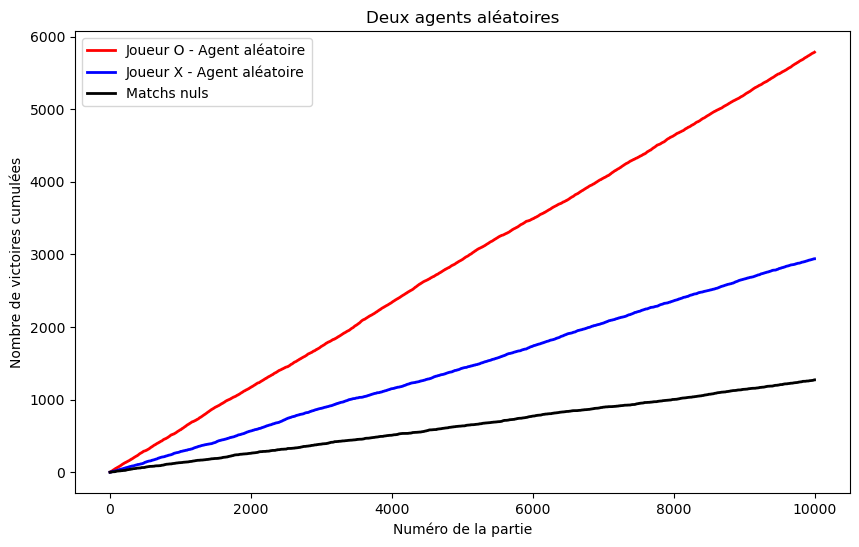

Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : 57.86 %
Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : 29.41 %
Pourcentage de matchs nuls : 12.73 %


In [27]:
# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))

# Tracé des courbes de victoires cumulées
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent aléatoire'
)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent aléatoire'
)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)

# Ajout du titre et des légendes
plt.title('Deux agents aléatoires')
plt.xlabel('Numéro de la partie')
plt.ylabel('Nombre de victoires cumulées')
plt.legend()
plt.show()

# Calcul et affichage des pourcentages
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : {pourcentage_victoires_joueur_1} %')

pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : {pourcentage_victoires_joueur_2} %')

pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [28]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre un agent RL et un agent aléatoire

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = entrainement_autonome(
    nb_parties=10**4,
    strategie_j1='rl',
    strategie_j2='random',
    afficher_partie=True
)


Partie numéro 5000



|     |     
  O  |  O  |  O
_____|_____|_____
     |     |     
  X  |  5  |  6
_____|_____|_____
     |     |     
  X  |  8  |  9
     |     |

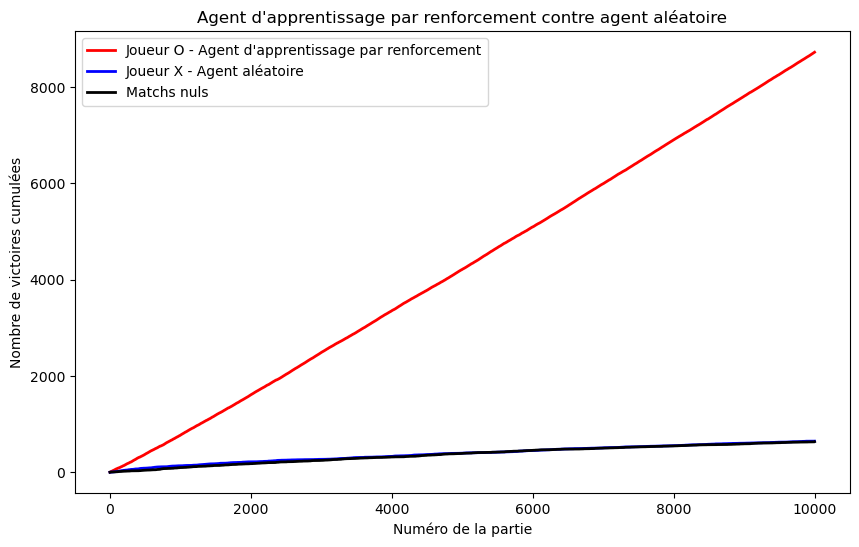

Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement) : 87.23 %
Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : 6.45 %
Pourcentage de matchs nuls : 6.32 %


In [29]:
# Tracer les résultats de l'entraînement
# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))

# Tracé des courbes de victoires cumulées
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent d\'apprentissage par renforcement'
)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent aléatoire'
)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)

# Ajout du titre et des légendes
plt.title('Agent d\'apprentissage par renforcement contre agent aléatoire')
plt.xlabel('Numéro de la partie')
plt.ylabel('Nombre de victoires cumulées')
plt.legend()
plt.show()

# Calcul et affichage des pourcentages
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_1} %')

pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : {pourcentage_victoires_joueur_2} %')

pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [30]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre un agent aléatoire et un agent RL

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = entrainement_autonome(
    nb_parties=10**4,
    strategie_j1='random',
    strategie_j2='rl',
    afficher_partie=True
)


Partie numéro 5000



|     |     
  X  |  O  |  3
_____|_____|_____
     |     |     
  O  |  O  |  X
_____|_____|_____
     |     |     
  7  |  O  |  X
     |     |

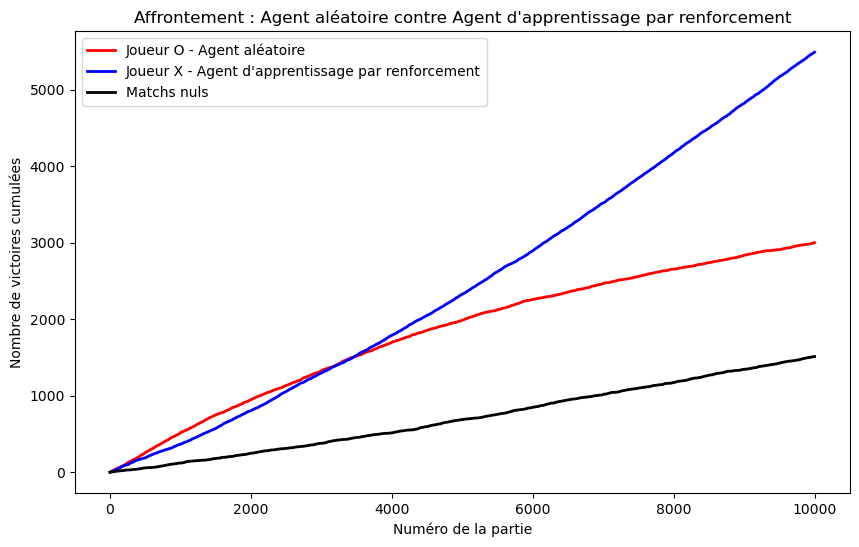

Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : 29.99 %
Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement) : 54.88 %
Pourcentage de matchs nuls : 15.13 %


In [31]:
# Tracer les résultats de l'affrontement entre un agent aléatoire et un agent RL
# Calcul des sommes cumulatives
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))

# Tracé des courbes de victoires cumulées
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent aléatoire'
)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent d\'apprentissage par renforcement'
)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)

# Ajout du titre et des légendes
plt.title('Affrontement : Agent aléatoire contre Agent d\'apprentissage par renforcement')
plt.xlabel('Numéro de la partie')
plt.ylabel('Nombre de victoires cumulées')
plt.legend()
plt.show()

# Calcul et affichage des pourcentages
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : {pourcentage_victoires_joueur_1} %')

pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_2} %')

pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [32]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre deux agents RL

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = entrainement_autonome(
    nb_parties=10**4,
    strategie_j1='rl',
    strategie_j2='rl',
    afficher_partie=True
)

Partie numéro 5000



|     |     
  X  |  O  |  O
_____|_____|_____
     |     |     
  X  |  X  |  X
_____|_____|_____
     |     |     
  7  |  O  |  O
     |     |

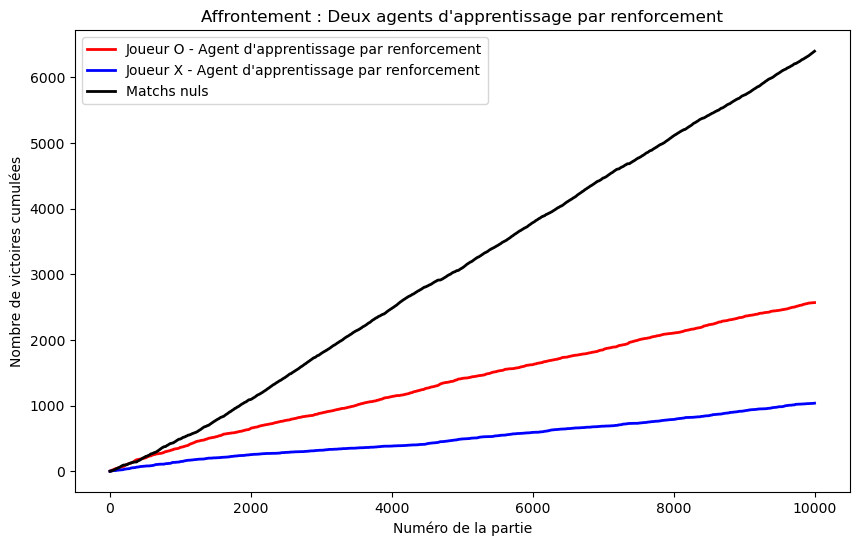

Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement) : 25.68 %
Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement) : 10.36 %
Pourcentage de matchs nuls : 63.96 %


In [33]:
# Tracer les résultats de l'affrontement entre deux agents RL
# Calcul des sommes cumulatives
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))

# Tracé des courbes de victoires cumulées
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent d\'apprentissage par renforcement'
)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent d\'apprentissage par renforcement'
)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)

# Ajout du titre et des légendes
plt.title('Affrontement : Deux agents d\'apprentissage par renforcement')
plt.xlabel('Numéro de la partie')
plt.ylabel('Nombre de victoires cumulées')
plt.legend()
plt.show()

# Calcul et affichage des pourcentages
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_1} %')

pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_2} %')

pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [34]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre deux agents d'apprentissage par renforcement

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = entrainement_autonome(
    nb_parties=10**4,
    strategie_j1='rl',
    strategie_j2='rl',
    afficher_partie=True
)

Partie numéro 5000



|     |     
  X  |  O  |  O
_____|_____|_____
     |     |     
  X  |  X  |  O
_____|_____|_____
     |     |     
  X  |  O  |  9
     |     |

Partie numéro 10000



|     |     
  X  |  O  |  X
_____|_____|_____
     |     |     
  4  |  O  |  X
_____|_____|_____
     |     |     
  O  |  O  |  9
     |     |

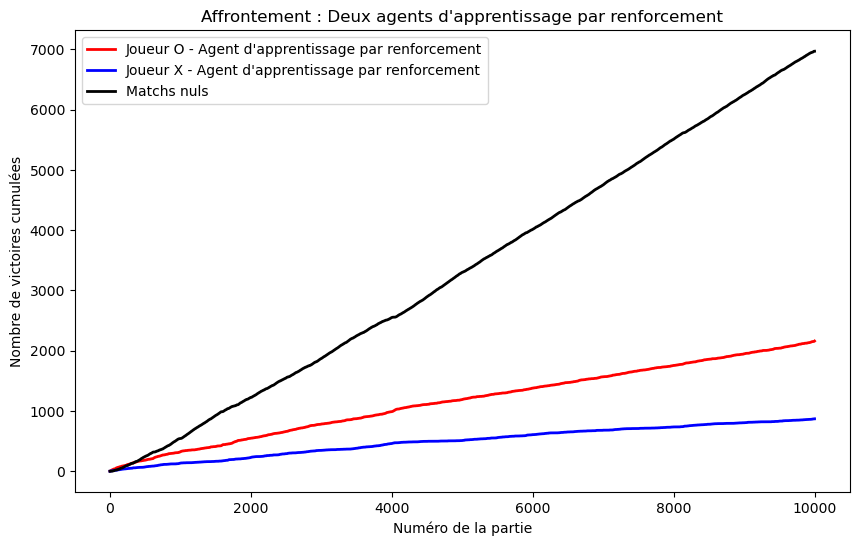

Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement) : 21.6 %
Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement) : 8.7 %
Pourcentage de matchs nuls : 69.7 %


In [35]:
# Tracer les résultats de l'affrontement entre deux agents d'apprentissage par renforcement

# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))

# Tracé des courbes de victoires cumulées pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent d\'apprentissage par renforcement'
)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent d\'apprentissage par renforcement'
)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)

# Ajout du titre et des légendes
plt.title('Affrontement : Deux agents d\'apprentissage par renforcement')
plt.xlabel('Numéro de la partie')
plt.ylabel('Nombre de victoires cumulées')
plt.legend()
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_1} %')

pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_2} %')

pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')